<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.31


In [ ]:
from pyndamics3.mcmc import *

## SIR Model

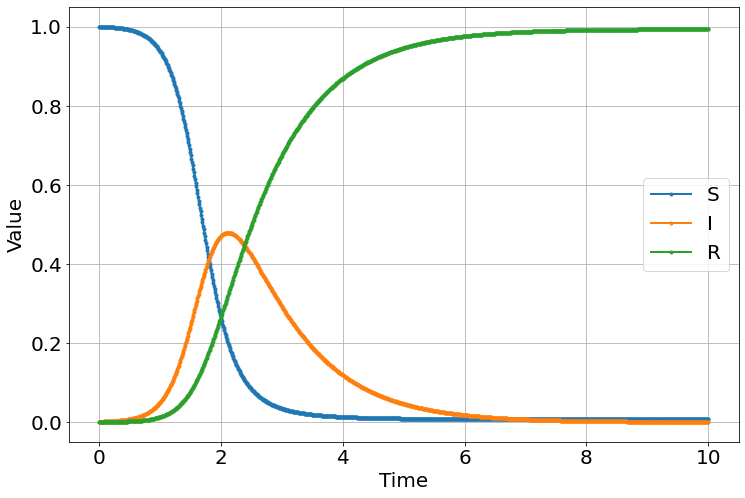

<Figure size 864x576 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("S'=-β*S*I",1,plot=1)
sim.add("I'=β*S*I-ζ*I",.001,plot=1)
sim.add("R'=ζ*I",0,plot=1) 
sim.params(β=5,ζ=1)
sim.run(0,10)

## SEIR Model

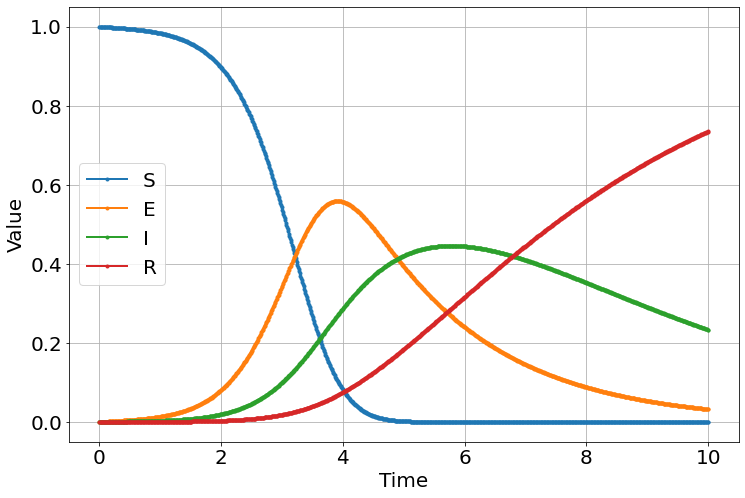

<Figure size 864x576 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("S'=-β*S*I",1,plot=1)
sim.add("E'=β*S*I-ζ*E",0,plot=1)
sim.add("I'=ζ*E-α*I",.001,plot=1) 
sim.add("R'=α*I",0,plot=1)  
sim.params(α=.3,β=10,ζ=.5)
sim.run(0,10)

## SZR Model from Munz et al. (2009)

Notice that no matter what the parameters are changed to, Z (zombies) always win.

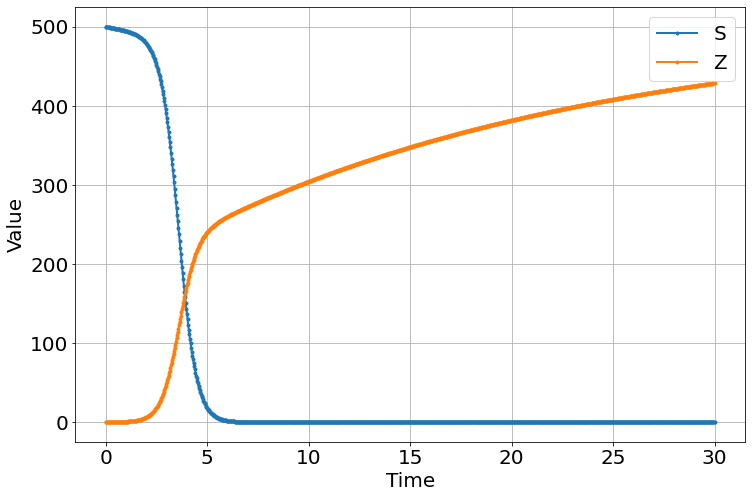

<Figure size 864x576 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("S'=Π-β*S*Z-δ*S",500,plot=1)                   #S (Susceptible)
sim.add("Z'=β*S*Z+ζ*R-α*S*Z",.002,plot=1)            #Z (Zombie)
sim.add("R'=δ*S+α*S*Z-ζ*R",1,plot=False)            #R (Removed)
sim.params(α=.005,β=.0095,ζ=.05, δ=.01,Π=0)     #parameters changed to match the Munz et al. (2009) figures
sim.run(0,30)

## SEZR Model based on dynamics observed in 'Night of the Living Dead'

Movie "data" from Night of the Living Dead

In [ ]:
t=array([0,1,1.5,3,4.5,5,5.75,5.9,10])
zombies=array([1,1,3,8,10,20,28,30,40])

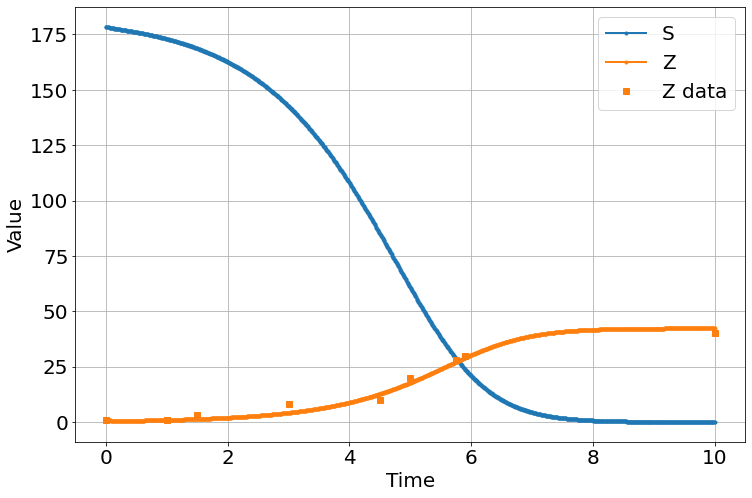

<Figure size 864x576 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("S'=-β*S*Z-δ*S",178.5,plot=1)
sim.add("E'=β*S*Z-ζ*E",0,plot=False)
sim.add("Z'=ζ*E-α*S*Z",1,plot=1) 
sim.add("R'=α*S*Z+δ*S",0,plot=False) 
sim.params(α=.0342,β=.0445,ζ=4.63, δ=0.0)
sim.add_data(t=t,Z=zombies,plot=1)
sim.run(0,10)

MCMC parameter estimation for $\alpha$ (rate of zombies being permanently removed), $\beta$ (rate of susceptibles becoming infected), $\zeta$ (the rate of infected into becoming zombies), and $\delta$ (suicide rate among susceptibles)

In [ ]:
model=MCMCModel(sim,
                α=Uniform(0,.5),
                β=Uniform(0,.5),
                ζ=Uniform(0,10),
                δ=Uniform(0,.01),
               )

Sampling Prior...
Done.
0.41 s
Running MCMC 1/3...
Done.
1 m, 38.03 s
Running MCMC 2/3...
Done.
1 m, 43.90 s
Running MCMC 3/3...
Done.
1 m, 40.36 s


<Figure size 864x576 with 0 Axes>

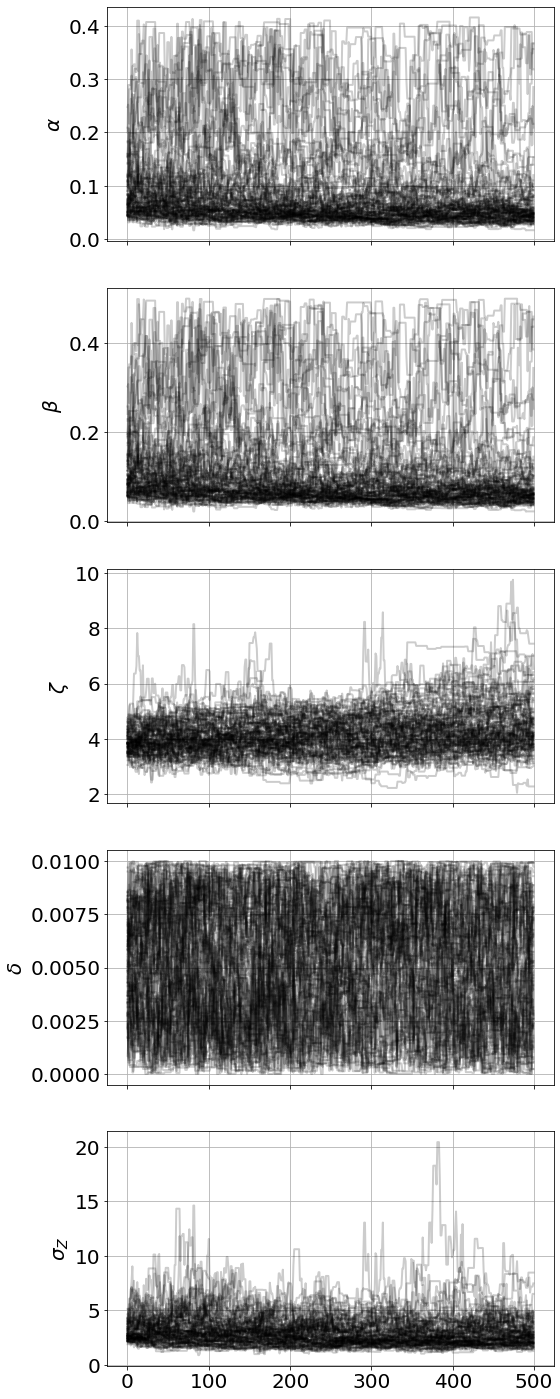

In [ ]:
number_of_iterations=500 # use 500 or so for the figures below, but for CI timeout reasons I include only 5
model.run_mcmc(number_of_iterations,repeat=3)
model.plot_chains()

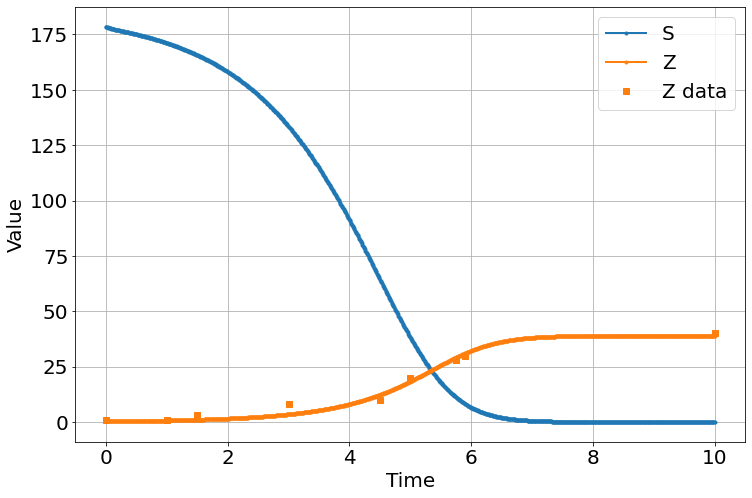

<Figure size 864x576 with 0 Axes>

In [ ]:
sim.run(0,10)

In [ ]:
Ro=model.eval('β/α')

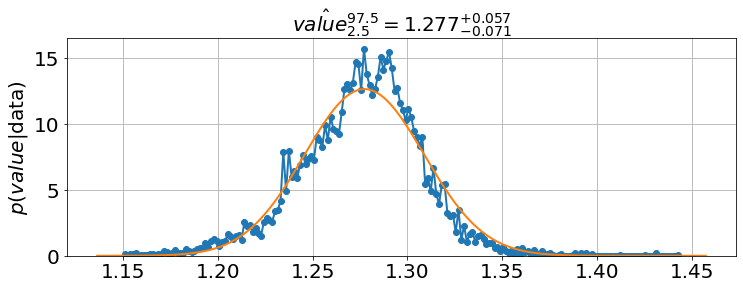

In [ ]:
model.plot_distributions(Ro)

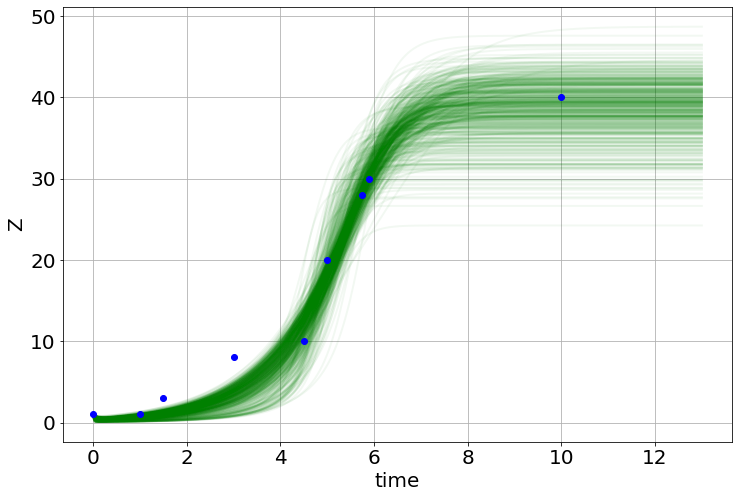

In [ ]:
model.plot_many(0,13,'Z')

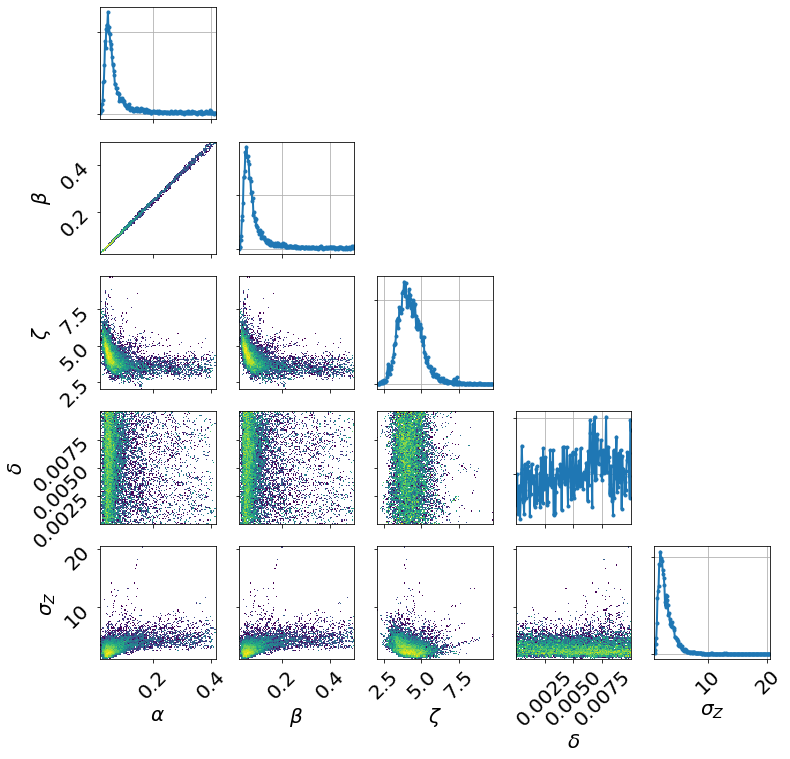

In [ ]:
model.triangle_plot()

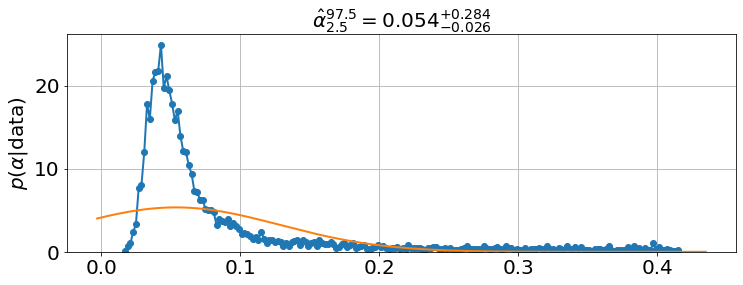

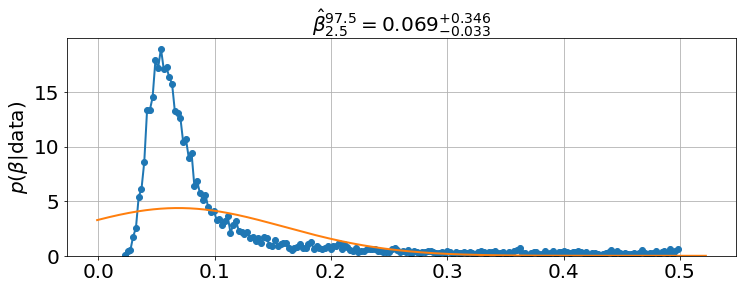

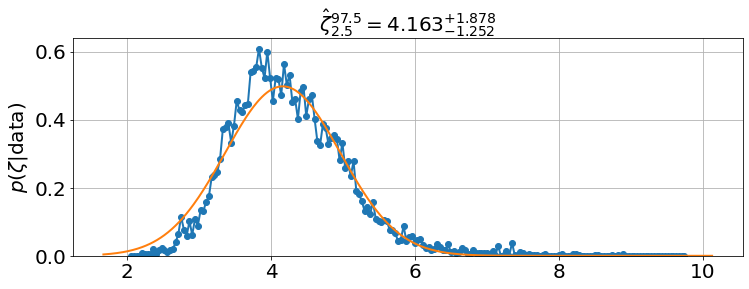

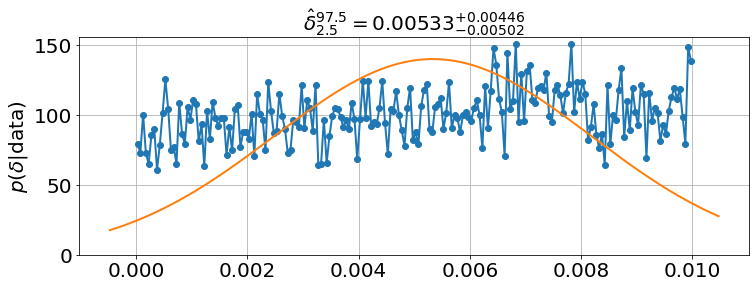

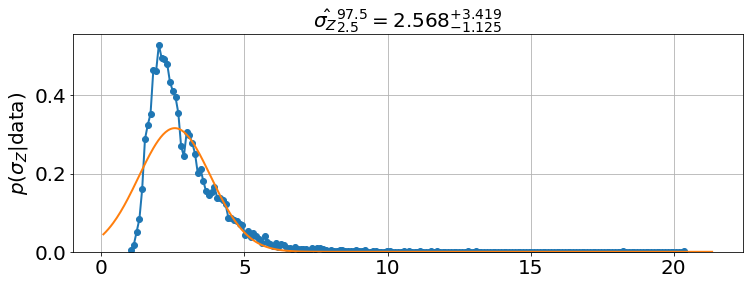

In [ ]:
model.plot_distributions()

## SEZR Model based on dynamics observed in 'Shaun of the Dead'

Data from Shaun of the Dead

In [ ]:
t=array([0,3,5,6,8,10,22,22.2,22.5,24,25.5,26,26.5,27.5,27.75,28.5,29,29.5,31.5])
zombies=array([0,1,2,2,3,3,4,6,2,3,5,12,15,25,37,25,65,80,100])

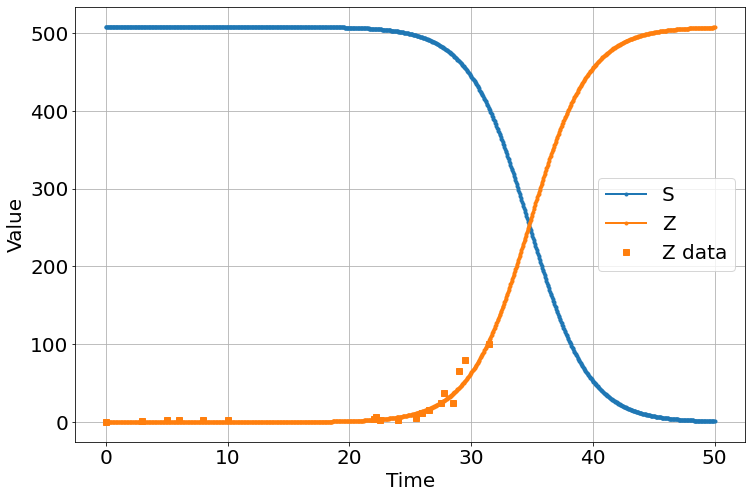

<Figure size 864x576 with 0 Axes>

In [ ]:
sim=Simulation()
sim.add("S'=-β*S*Z",508.2,plot=1)
sim.add("E'=β*S*Z-ζ*E",0,plot=0)
sim.add("Z'=ζ*E-α*S*Z",.000347759,plot=1)
sim.add("R'=α*S*Z",0,plot=False)
sim.params(α=2.96e-8,β=0.000808995,ζ=60)
sim.add_data(t=t,Z=zombies,plot=1)
sim.run(0,50)

In [ ]:
model=MCMCModel(sim,
                α=Uniform(0,.01),
                β=Uniform(0,.01),
                ζ=Uniform(0,100),
               )

Sampling Prior...
Done.
0.60 s
Running MCMC 1/3...
Done.
3 m, 42.85 s
Running MCMC 2/3...
Done.
4 m, 28.81 s
Running MCMC 3/3...
Done.
4 m, 40.73 s


<Figure size 864x576 with 0 Axes>

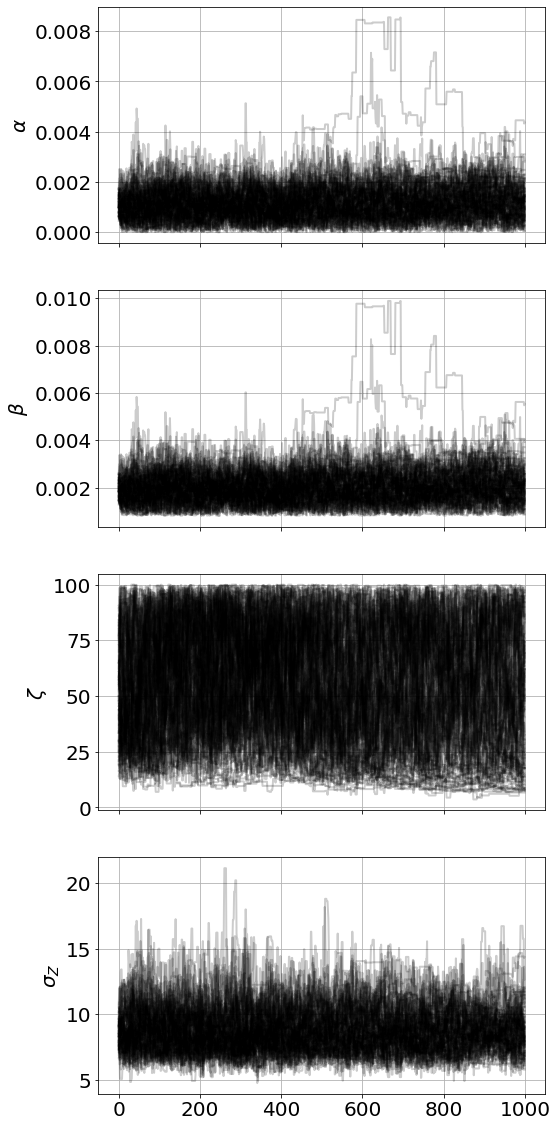

In [ ]:
model.run_mcmc(2*number_of_iterations,repeat=3)
model.plot_chains()

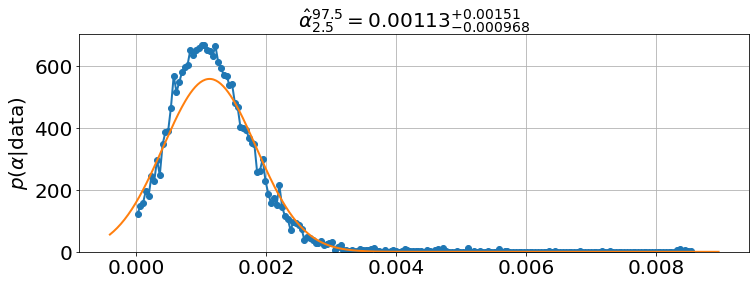

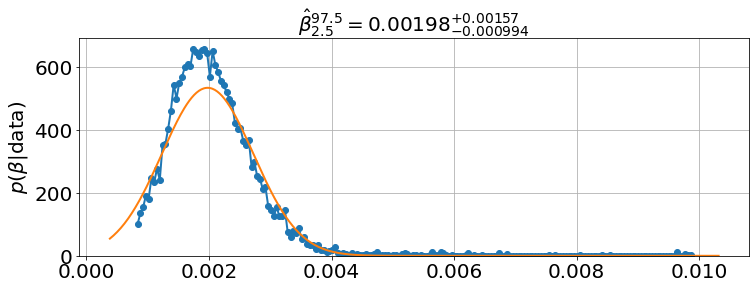

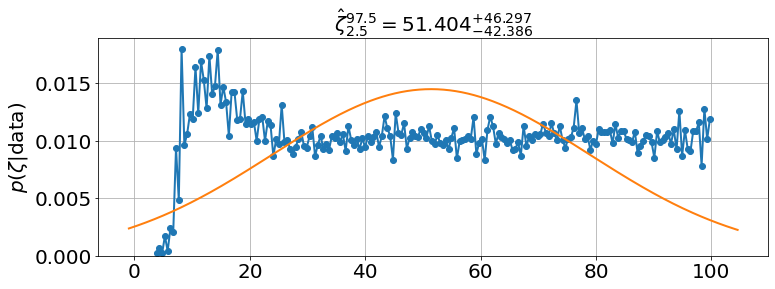

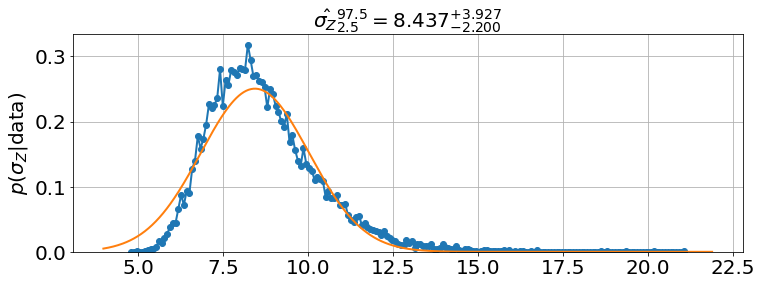

In [ ]:
model.plot_distributions()

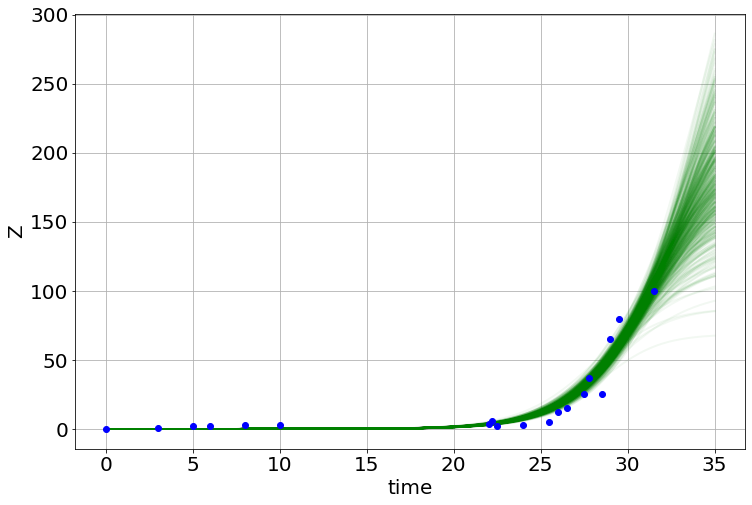

In [ ]:
model.plot_many(0,35,'Z')

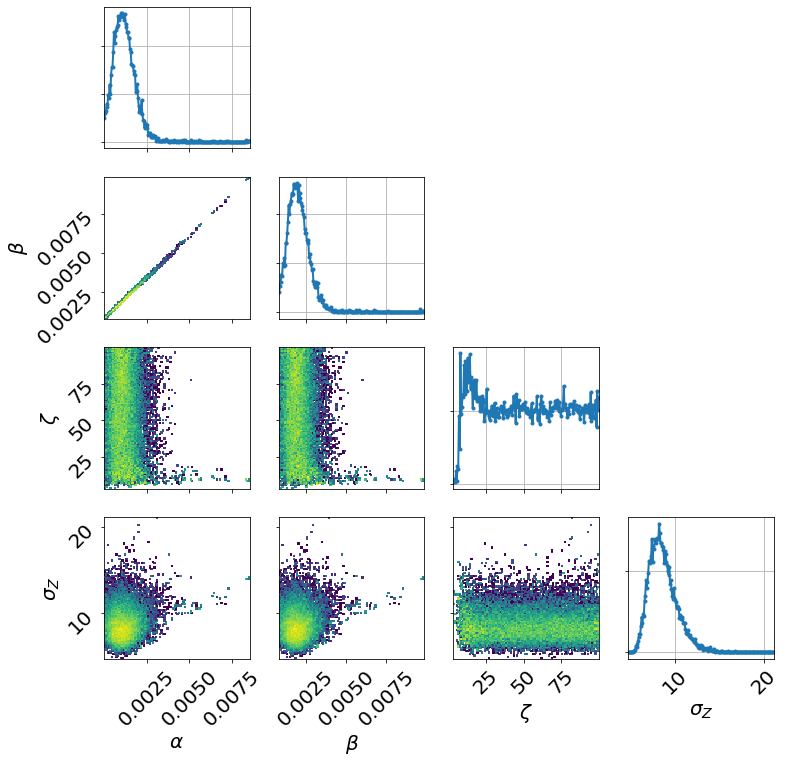

In [ ]:
model.triangle_plot()

## With different priors

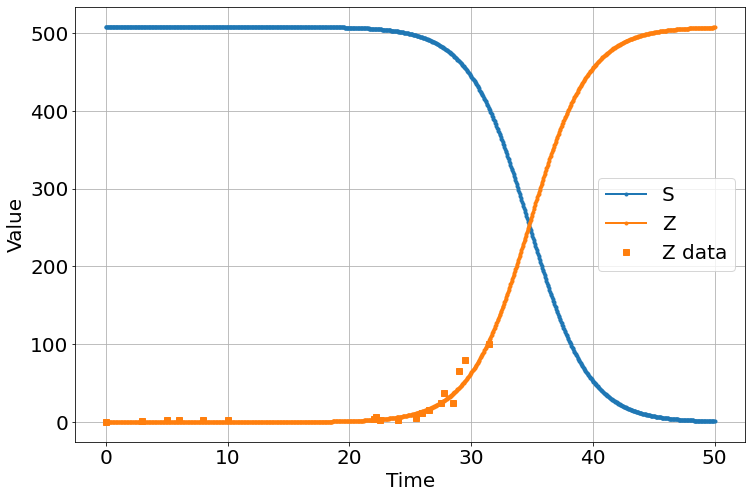

<Figure size 864x576 with 0 Axes>

In [ ]:
t=array([0,3,5,6,8,10,22,22.2,22.5,24,25.5,26,26.5,27.5,27.75,28.5,29,29.5,31.5])
zombies=array([0,1,2,2,3,3,4,6,2,3,5,12,15,25,37,25,65,80,100])

sim=Simulation()
sim.add("S'=-β*S*Z",508.2,plot=1)
sim.add("E'=β*S*Z-ζ*E",0,plot=0)
sim.add("Z'=ζ*E-α*S*Z",.000347759,plot=1)
sim.add("R'=α*S*Z",0,plot=False)
sim.params(α=2.96e-8,β=0.000808995,ζ=60)
sim.add_data(t=t,Z=zombies,plot=1)
sim.run(0,50)

model=MCMCModel(sim,
                α=Uniform(0,.01),
                β=Uniform(0,.01),
                ζ=Normal(10,10,all_positive=True)
               )

Sampling Prior...


/Users/bblais/opt/anaconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


Done.
0.81 s
Running MCMC 1/2...
Done.
2 m, 12.73 s
Running MCMC 2/2...
Done.
2 m, 33.87 s


<Figure size 864x576 with 0 Axes>

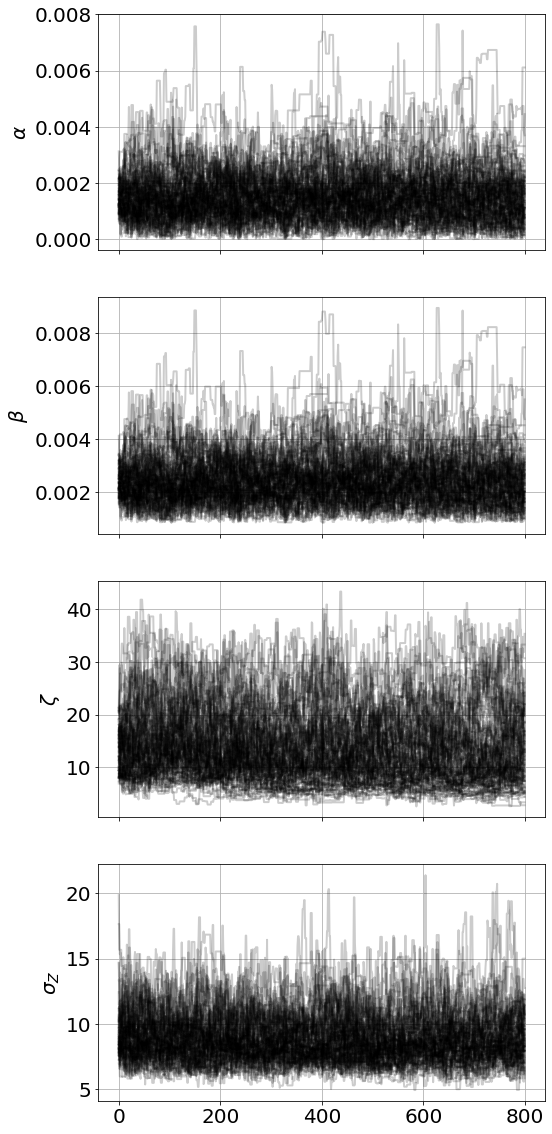

In [ ]:
model.run_mcmc(800,repeat=2)
model.plot_chains()

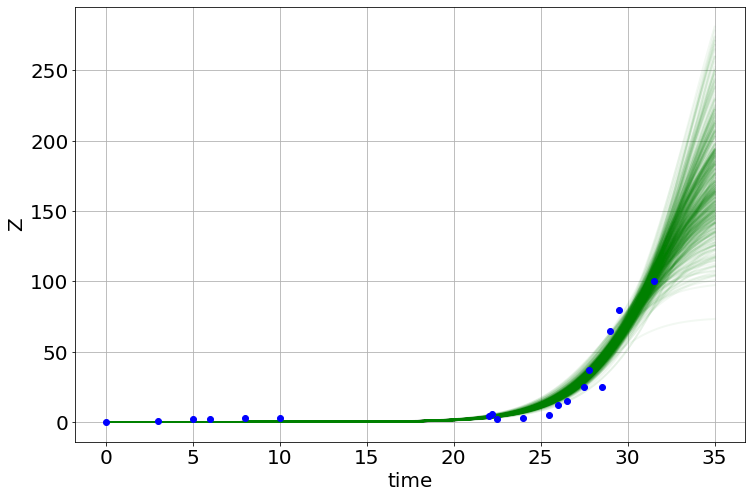

In [ ]:
model.plot_many(0,35,'Z')

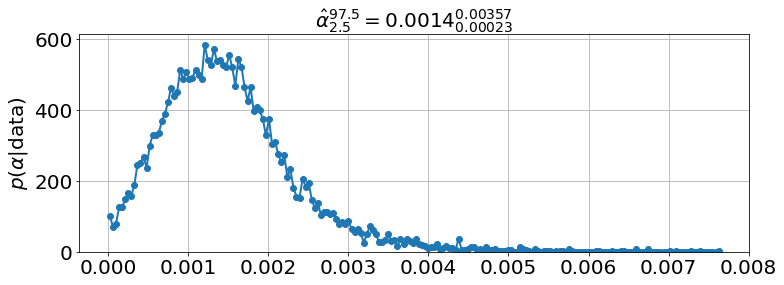

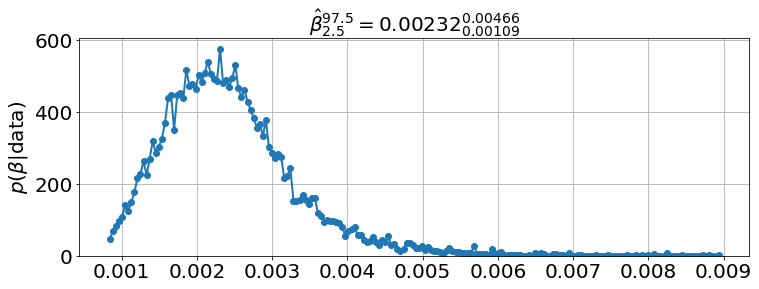

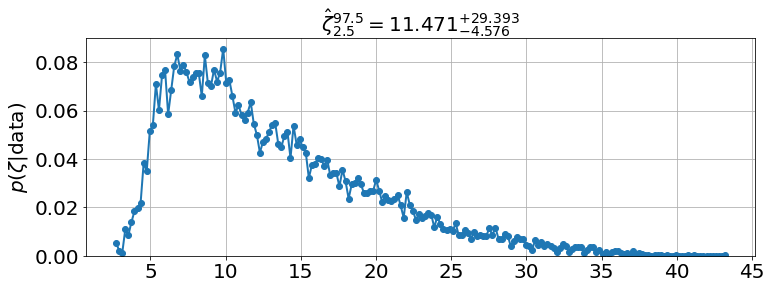

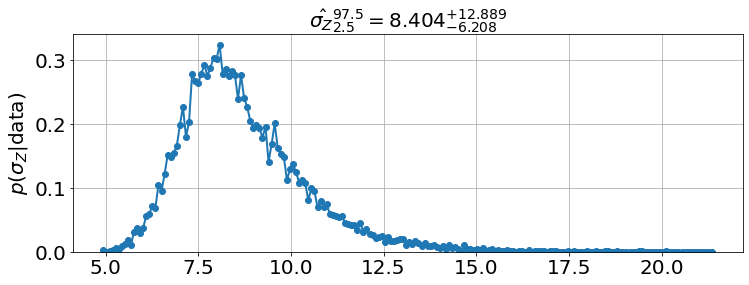

In [ ]:
model.plot_distributions()